In [1]:
import tskit
import numpy as np
from IPython.display import display, SVG

rng = np.random.default_rng()

This lets you plot some of the trees at a few places along the genome,
of 40 randomly sampled individuals in each of the four populations,
with tips colored by population.

In [2]:
# put in name of trees file here
ts = tskit.load("intro_2531178952994_0.01.trees")

In [3]:
sample_sets = [ts.samples(k) for k in [4, 3, 2, 1]]
sts = ts.simplify(np.concatenate([rng.choice(x, 40, replace=False) for x in sample_sets]))

".node.p0 > .sym {fill: red}" applies to nodes from population 1
".node.p1 > .sym {fill: green}" applies to nodes from population 2
".node.p2 > .sym {fill: blue}" applies to nodes from population 3
".node.p3 > .sym {fill: purple}" applies to nodes from population 4
CSS string applied:
    ".node.p0 > .sym {fill: red} .node.p1 > .sym {fill: green} .node.p2 > .sym {fill: blue} .node.p3 > .sym {fill: purple}"


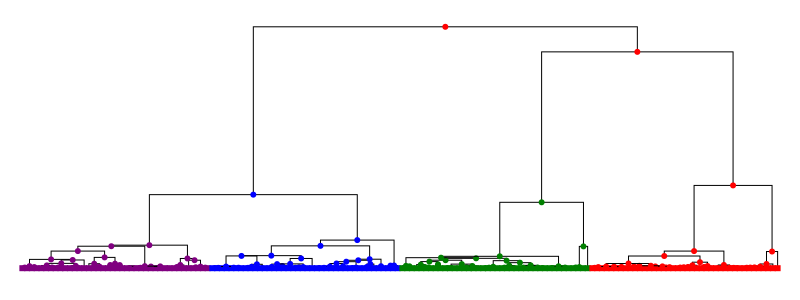

In [4]:
styles = []
# Create a style for each population, programmatically (or just type the string by hand)
for colour, p in zip(['red', 'green', 'blue', 'purple'], range(4)):
    # target the symbols only (class "sym")
    s = f".node.p{p} > .sym " + "{" + f"fill: {colour}" + "}"
    styles.append(s)
    print(f'"{s}" applies to nodes from population {p+1}')
css_string = " ".join(styles)
print(f'CSS string applied:\n    "{css_string}"')

def draw_tree(t):
    return SVG(t.draw_svg(
        size=(800, 300),
        node_labels={},    # Remove all node labels for a clearer viz
        style=css_string,  # Apply the stylesheet
    ))
    
draw_tree(sts.first())

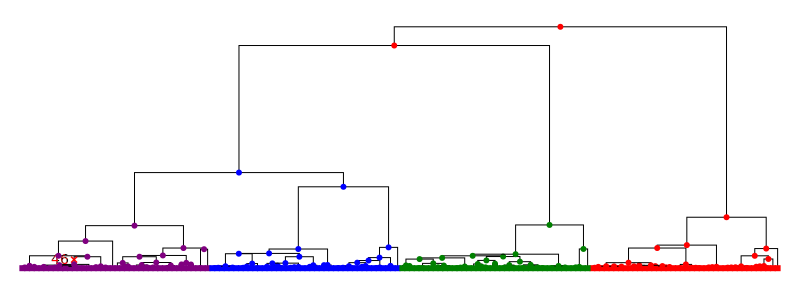

In [5]:
draw_tree(sts.at(100000))

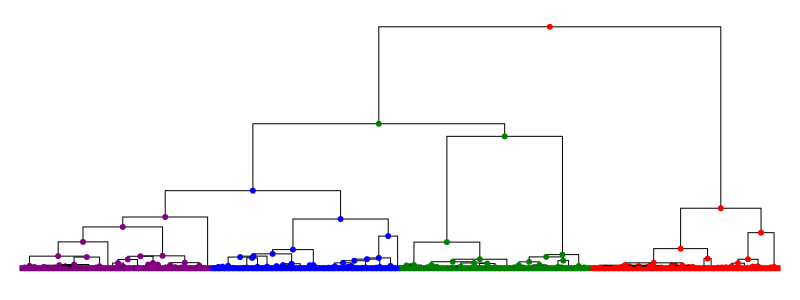

In [6]:
draw_tree(sts.at(300000))

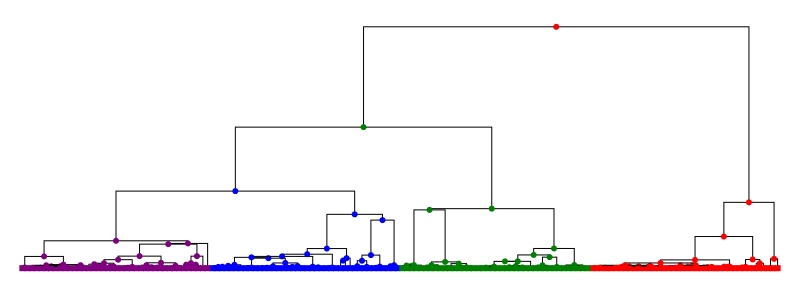

In [7]:
draw_tree(sts.at(500000))